# Basic Exploration Activity

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). [Link to landing page](https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2)

## Notes on Data

- *Clean Alternative Fuel Vehicle Eligibility*: This categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.
- *Electric Vehicle Type*: This distinguishes the vehicle as all electric or a plug-in hybrid.

### Clean Alternative Fuel Vehicle Eligibility

Clean Alternative Fuel Vehicle (CAFV) Eligibility is based on the fuel requirement and electric-only range requirement as outlined during the 2019 State legislative session in House Bill 2042 to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions. Sales or leases of these vehicles must occur on or after 8/1/2019, and meet the purchase price requirements outlined in House Bill 2042 to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions.

### Electric Vehicle Type

A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle in to an electric power source. A Plug-in Hybrid Electric Vehicle (PHEV) is a vehicle that uses one or more batteries to power an electric motor; uses another fuel, such as gasoline or diesel, to power an internal combustion engine or other propulsion source; and is charged by plugging the vehicle in to an electric power source.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import re

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def rename_column(column_name):
    """Rename a column by substituting non-alphanumeric for '_' and make string lowercase"""
    return re.sub(r"\W+", '_', column_name).lower()

In [3]:
# import data
df = pd.read_csv('electric-vehicle-pop-data.csv', usecols=[1, 2, 3, 5, 6 ,7, 8, 9, 10, 11])

# rename the columns
df.columns = df.columns.map(rename_column)

# cast the 'electric_vehicle_type' column to categorical dtype
evt_mapping = {
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
}
df['electric_vehicle_type'] = df['electric_vehicle_type'].map(evt_mapping).astype('category')

# cast the 'clean_alternative_fuel_vehicle_cafv_eligibility' column to bool dtype and rename the column
cafv_mapping = {
    'Clean Alternative Fuel Vehicle Eligible': True,
    'Not eligible due to low battery range': False
}
df['clean_alternative_fuel_vehicle_cafv_eligibility'] = df['clean_alternative_fuel_vehicle_cafv_eligibility'].map(cafv_mapping)
df.rename(columns={'clean_alternative_fuel_vehicle_cafv_eligibility': 'cafv_eligibility'}, inplace=True)

df.head()

,county,city,state,model_year,make,model,electric_vehicle_type,cafv_eligibility,electric_range,base_msrp
0,King,Seattle,WA,2019,Audi,e-tron,BEV,True,204,74800.0
1,King,Bothell,WA,2017,Nissan,Leaf,BEV,True,107,30680.0
2,King,Seattle,WA,2016,Nissan,Leaf,BEV,True,84,29010.0
3,King,Seattle,WA,2018,BMW,i3,BEV,True,114,44450.0
4,King,Redmond,WA,2016,Nissan,Leaf,BEV,True,84,29010.0


## Missing Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54895 entries, 0 to 54894
Data columns (total 10 columns):
county                   54892 non-null object
city                     54895 non-null object
state                    54895 non-null object
model_year               54895 non-null int64
make                     54895 non-null object
model                    54895 non-null object
electric_vehicle_type    54895 non-null category
cafv_eligibility         54895 non-null bool
electric_range           54895 non-null int64
base_msrp                54439 non-null float64
dtypes: bool(1), category(1), float64(1), int64(2), object(5)
memory usage: 3.5+ MB


In [5]:
df.isna().sum() / df.shape[0]

county                   0.000055
city                     0.000000
state                    0.000000
model_year               0.000000
make                     0.000000
model                    0.000000
electric_vehicle_type    0.000000
cafv_eligibility         0.000000
electric_range           0.000000
base_msrp                0.008307
dtype: float64

**Method**: Drop the rows that contain *any* missing values

In [6]:
df = df.dropna()
df.head()

,county,city,state,model_year,make,model,electric_vehicle_type,cafv_eligibility,electric_range,base_msrp
0,King,Seattle,WA,2019,Audi,e-tron,BEV,True,204,74800.0
1,King,Bothell,WA,2017,Nissan,Leaf,BEV,True,107,30680.0
2,King,Seattle,WA,2016,Nissan,Leaf,BEV,True,84,29010.0
3,King,Seattle,WA,2018,BMW,i3,BEV,True,114,44450.0
4,King,Redmond,WA,2016,Nissan,Leaf,BEV,True,84,29010.0


## Exploration

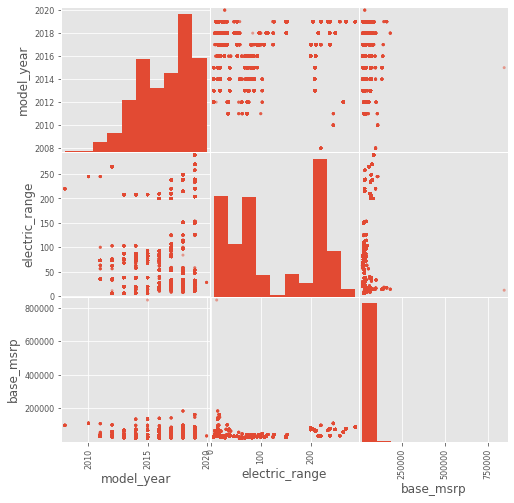

In [7]:
pd.plotting.scatter_matrix(df[['model_year', 'electric_range', 'base_msrp']], figsize=(8, 8))
plt.show()

### Analysis of Scatter Matrix

- Model Year: There is a negative skew. The relationship with the other variables is stratified.
- Electric Range: The variation is high, as seen by the two humps that the histogram creates. There doesn't appear to be a relationship strong correlation with base_msrp.
- Base MSRP: The base msrp of the vehicles appear to all be within the same range, with a few outliers, causing a positive skew

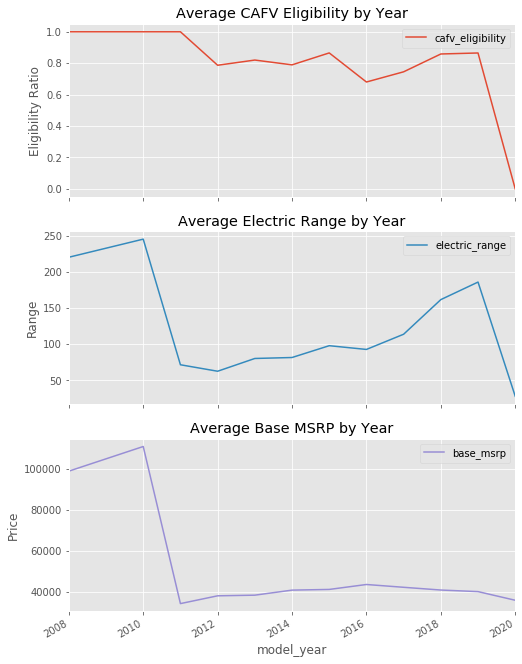

In [8]:
axes = df.groupby('model_year').mean().plot(subplots=True, figsize=(8, 12))

axes[0].set_title('Average CAFV Eligibility by Year')
axes[0].set_ylabel('Eligibility Ratio')
axes[1].set_title('Average Electric Range by Year')
axes[1].set_ylabel('Range')
axes[2].set_title('Average Base MSRP by Year')
axes[2].set_ylabel('Price')

plt.show()

### Analysis of Average by Year

- Average CAFV: There appears to be a high ratio of eligible vehicles, with a drop towards the end (2020). May be due to low amount of data points with 2020 as model_year.
- Average Range: Interesting, I would have thought as time progressed, the average Range would increase, but instead there is a dip in the dataset. May be due to a high range vehicle in the beginning of the time series, and at the end.
- Average Base MSRP: Somewhat according to my assumption, the base MSRP descreases as time progressed. However, there is a drastic drop after 2010, and the line seems to have low variation after. The drastic decrease may be due to the manufacturing of more commercially accessible vehicles.